In [7]:
import numpy as np
import open3d as o3d
#import wget
#import tarfile
#import os
import trimesh
from scipy.spatial import ConvexHull
from scipy.spatial.distance import cdist
from matplotlib import pyplot as plt

RECONSTRUCTION WITH BPA AND POISSON - ATRIAL MESH

In [2]:
path = "./Data/atrial_open.csv"
pc = np.loadtxt(path,skiprows=1,delimiter=',')

pcd = o3d.geometry.PointCloud()
print(pc.shape)
pcd.points = o3d.utility.Vector3dVector(pc[:,:])
pcd.estimate_normals()
pcd.orient_normals_consistent_tangent_plane(6)
o3d.visualization.draw_geometries([pcd])

(89096, 3)


In [3]:
path = "./Data/atrial_pc.csv"
pc = np.loadtxt(path,skiprows=1,delimiter=',')

pcd = o3d.geometry.PointCloud()
print(pc.shape)
pcd.points = o3d.utility.Vector3dVector(pc[:,1:4])
pcd.estimate_normals()
pcd.orient_normals_consistent_tangent_plane(6)
o3d.visualization.draw_geometries([pcd])


(112132, 4)


In [4]:
input_path = "./"
output_path = "./"

In [5]:
#Compute the distances to the nearest neighbor and the average
distances = pcd.compute_nearest_neighbor_distance()
avg_dist = np.mean(distances)
radius = 3 * avg_dist

In [ ]:
#Create the mesh
bpa_mesh = o3d.geometry.TriangleMesh.create_from_point_cloud_ball_pivoting(pcd,o3d.utility.DoubleVector([radius, radius * 2]))

#Second method for the mesh
poisson_mesh = o3d.geometry.TriangleMesh.create_from_point_cloud_poisson(pcd, depth=8, width=0, scale=1.1, linear_fit=False)[0]

In [7]:

#This works with ply and stl
o3d.io.write_triangle_mesh(output_path+"atrial_bpa.ply", bpa_mesh)

#This only works with ply
o3d.io.write_triangle_mesh(output_path+"atrial_poisson.ply", poisson_mesh)

True

In [19]:
#Import a mesh from the file and visualize it
bpa_mesh = o3d.io.read_triangle_mesh(output_path+"atrial_bpa.ply")
bpa_mesh.paint_uniform_color([0.2, 0.2, 1])
bpa_mesh.compute_vertex_normals()
o3d.visualization.draw_geometries([bpa_mesh])

TriangleMesh with 112132 points and 224101 triangles.

In [20]:
#Import a mesh from the file and visualize it
poiss_mesh = o3d.io.read_triangle_mesh(output_path+"atrial_poisson.ply")
poiss_mesh.paint_uniform_color([0.2, 0.2, 1])
poiss_mesh.compute_vertex_normals()
o3d.visualization.draw_geometries([poiss_mesh])

TriangleMesh with 177512 points and 355020 triangles.

In [22]:
original = o3d.io.read_triangle_mesh(output_path+"Data/atrial_original.stl")
N = 100000
point_cloud = original.sample_points_uniformly(N)

# Returned 420 points in testing
hull = ConvexHull(np.array(point_cloud.points))

# Extract the points forming the hull
hullpoints = np.array(point_cloud.points)[hull.vertices,:]

# Naive way of finding the best pair in O(H^2) time if H is number of points on
# hull
hdist = cdist(hullpoints, hullpoints, metric='euclidean')

# Get the farthest apart points
bestpair = np.unravel_index(hdist.argmax(), hdist.shape)

#Print them
max_dist = np.linalg.norm(hullpoints[bestpair[0]]-hullpoints[bestpair[1]])

b = poiss_mesh.sample_points_uniformly(N)
c = bpa_mesh.sample_points_uniformly(N)


dist = point_cloud.compute_point_cloud_distance(b)
dist2 = point_cloud.compute_point_cloud_distance(c)

dist3 = b.compute_point_cloud_distance(point_cloud)
dist4 = c.compute_point_cloud_distance(point_cloud)

distanza=np.concatenate([dist,dist3])
distanza2=np.concatenate([dist2,dist4])


print("Poisson-atrial")
print(round(100*np.mean(distanza)/max_dist, 3), "%")
print(round(100*np.max(distanza)/max_dist, 3), "%")


print("BPA-atrial")
print(round(100*np.mean(distanza2)/max_dist, 3), "%")
print(round(100*np.max(distanza2)/max_dist, 3), "%")


Poisson-atrial
0.184 %
0.715 %
BPA-atrial
0.182 %
0.712 %


In [23]:
# Load mesh from a file
mesh_atria = trimesh.load(output_path+"Data/atrial_original.stl")
# Calculate the volume
volume_a0 = mesh_atria.volume

# Load mesh from a file
mesh_atria_bpa = trimesh.load(output_path+"atrial_bpa.ply")
# Calculate the volume
volume_a1 = mesh_atria_bpa.volume

mesh_atria_poisson = trimesh.load(output_path+"atrial_poisson.ply")
# Calculate the volume
volume_a2 = mesh_atria_poisson.volume

# Calcolo dell'errore globale in percentuale considerando i volumi
print("Global error BPA", round(100*abs(volume_a0-volume_a1)/volume_a0, 5), "%")
print("Global error Poisson", round(100*abs(volume_a0-volume_a2)/volume_a0, 5), "%")



Global error BPA 5e-05 %
Global error Poisson 0.00694 %


RECONSTRUCTION WITH BPA AND POISSON - AORTA MESH

In [25]:
path = "./Data/aorta_pc.csv"
pc_aorta = np.loadtxt(path,skiprows=1,delimiter=',')

pcd_aorta = o3d.geometry.PointCloud()
print(pc_aorta.shape)
pcd_aorta.points = o3d.utility.Vector3dVector(pc_aorta[:,:])
pcd_aorta.estimate_normals()
pcd_aorta.orient_normals_consistent_tangent_plane(6)

(81000, 3)


In [26]:
o3d.visualization.draw_geometries([pcd_aorta])
#Compute the distances to the nearest neighbor and the average
distances_aorta = pcd_aorta.compute_nearest_neighbor_distance()
avg_dist_aorta = np.mean(distances_aorta)
radius_aorta = 3 * avg_dist_aorta

In [4]:
#Create the mesh
bpa_mesh_aorta = o3d.geometry.TriangleMesh.create_from_point_cloud_ball_pivoting(pcd_aorta,o3d.utility.DoubleVector([radius_aorta, radius_aorta * 2]))

#Second method for the mesh
poisson_mesh_aorta = o3d.geometry.TriangleMesh.create_from_point_cloud_poisson(pcd_aorta, depth=8, width=0, scale=1.1, linear_fit=False)[0]

In [27]:
input_path = "./"
output_path = "./"

In [7]:
#This works with ply and stl
o3d.io.write_triangle_mesh(output_path+"aorta_bpa.ply", bpa_mesh_aorta)

#This only works with ply
o3d.io.write_triangle_mesh(output_path+"aorta_poisson.ply", poisson_mesh_aorta)

True

In [31]:
#Import a mesh from the file and visualize it
bpa_mesh_aorta = o3d.io.read_triangle_mesh(output_path+"aorta_bpa.ply")
bpa_mesh_aorta.paint_uniform_color([0.2, 0.2, 1])
bpa_mesh.compute_vertex_normals()
o3d.visualization.draw_geometries([bpa_mesh_aorta])

In [32]:
#Import a mesh from the file and visualize it
poisson_mesh_aorta = o3d.io.read_triangle_mesh(output_path+"aorta_poisson.ply")
poisson_mesh_aorta.paint_uniform_color([0.2, 0.2, 1])
poisson_mesh_aorta.compute_vertex_normals()
o3d.visualization.draw_geometries([poisson_mesh_aorta])

In [39]:

original = o3d.io.read_triangle_mesh(output_path+"Data/aorta_original.stl")
N = 100000
point_cloud = original.sample_points_uniformly(N)

# Returned 420 points in testing
hull = ConvexHull(np.array(point_cloud.points))

# Extract the points forming the hull
hullpoints = np.array(point_cloud.points)[hull.vertices,:]

# Naive way of finding the best pair in O(H^2) time if H is number of points on
# hull
hdist = cdist(hullpoints, hullpoints, metric='euclidean')

# Get the farthest apart points
bestpair = np.unravel_index(hdist.argmax(), hdist.shape)

#Print them
max_dist = np.linalg.norm(hullpoints[bestpair[0]]-hullpoints[bestpair[1]])


b = poisson_mesh_aorta.sample_points_uniformly(N)
c = bpa_mesh_aorta.sample_points_uniformly(N)


dist = point_cloud.compute_point_cloud_distance(b)
dist2 = point_cloud.compute_point_cloud_distance(c)

dist3 = b.compute_point_cloud_distance(point_cloud)
dist4 = c.compute_point_cloud_distance(point_cloud)

distanza=np.concatenate([dist,dist3])
distanza2=np.concatenate([dist2,dist4])


print("Poisson-atrial")
print(round(100*np.mean(distanza)/max_dist, 3), "%")
print(round(100*np.max(distanza)/max_dist,3), "%")


print("BPA-atrial")
print(round(100*np.mean(distanza2)/max_dist, 3), "%")
print(round(100*np.max(distanza2)/max_dist, 3), "%")

Poisson-atrial
0.096 %
0.997 %
BPA-atrial
0.091 %
0.868 %


In [40]:
# Load mesh from a file
mesh_aorta = trimesh.load(output_path+"Data/aorta_original.stl")
# Calculate the volume
volume_aorta0 = mesh_aorta.volume

# Load mesh from a file
mesh_aorta_bpa = trimesh.load(output_path+"aorta_bpa.ply")
# Calculate the volume
volume_aorta1 = mesh_aorta_bpa.volume

mesh_aorta_poisson = trimesh.load(output_path+"aorta_poisson.ply")
# Calculate the volume
volume_aorta2 = mesh_aorta_poisson.volume

# Calcolo dell'errore globale in percentuale considerando i volumi
print("Global error BPA", round(100*abs(volume_aorta0-volume_aorta1)/volume_aorta0, 4), "%")
print("Global error Poisson", round(100*abs(volume_aorta0-volume_aorta2)/volume_aorta0, 4), "%")


Global error BPA 3.6059 %
Global error Poisson 0.0028 %


ADD WHITE NOISE (0.5% OR 1%) - ATRIAL MESH

In [41]:
#Folder with cloud points files, folder for outputs
input_path="./"
output_path="./"
#dataname="sample_w_normals.xyz"
dataname="Data/atrial_pc.csv"

#Load data
point_cloud= np.loadtxt(input_path+dataname,skiprows=1,delimiter=',')[:,1:4]

In [42]:
#Add white noise to the data
def add_noise(p_cloud, sigma=0.1):
    noise = np.random.normal(0, sigma, size=(np.shape(p_cloud)))
    p_cloud = p_cloud + noise
    return p_cloud

def add_noisy_pts(p_cloud, perc_pts, sigma=0.1):
    num_pts = len(p_cloud)*perc_pts
    noise = np.random.normal(0, sigma, size=(num_pts,3))
    sampled = np.random.sample(p_cloud, num_pts)
    sampled = sampled + noise

In [43]:
#Convert the data into open3d coordinates
point_cloud = add_noise(point_cloud, sigma=np.abs(np.mean(point_cloud)*0.005))
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(point_cloud[:,:])
pcd.estimate_normals()
pcd.orient_normals_consistent_tangent_plane(10)
#Visualize points
o3d.visualization.draw_geometries([pcd], point_show_normal = False)

In [44]:
#Compute the distances to the nearest neighbor and the average
distances = pcd.compute_nearest_neighbor_distance()
avg_dist = np.mean(distances)
radius = 3 * avg_dist

In [45]:
#Create BPA mesh
bpa_geom = o3d.geometry.TriangleMesh.create_from_point_cloud_ball_pivoting(pcd,o3d.utility.DoubleVector([radius, radius * 2]))

#Create Poisson mesh
poisson_geom, densities = o3d.geometry.TriangleMesh.create_from_point_cloud_poisson(pcd, depth=8, width=0, scale=1.1, linear_fit=False)

In [46]:
#This works with ply and stl
o3d.io.write_triangle_mesh(output_path+"atrial_bpa_wn_05.ply", bpa_geom)

#This only works with ply
o3d.io.write_triangle_mesh(output_path+"atrial_poisson_wn_05.ply", poisson_geom)

True

In [49]:
#Import a mesh from the file and visualize it
bpa_geom = o3d.io.read_triangle_mesh(output_path+"atrial_bpa_wn_05.ply")
bpa_geom.paint_uniform_color([0.5, 0.5, 1])
bpa_mesh.compute_vertex_normals()
o3d.visualization.draw_geometries([bpa_geom])

In [48]:
#Import a mesh from the file and visualize it
poisson_geom = o3d.io.read_triangle_mesh(output_path+"atrial_poisson_wn_05.ply")
poisson_geom.paint_uniform_color([0.5, 0.5, 1])
poisson_geom.compute_vertex_normals()
o3d.visualization.draw_geometries([poisson_geom])

In [53]:
original = o3d.io.read_triangle_mesh(output_path+"Data/atrial_original.stl")
N = 100000
point_cloud = original.sample_points_uniformly(N)

# Returned 420 points in testing
hull = ConvexHull(np.array(point_cloud.points))

# Extract the points forming the hull
hullpoints = np.array(point_cloud.points)[hull.vertices,:]

# Naive way of finding the best pair in O(H^2) time if H is number of points on
# hull
hdist = cdist(hullpoints, hullpoints, metric='euclidean')

# Get the farthest apart points
bestpair = np.unravel_index(hdist.argmax(), hdist.shape)

#Print them
max_dist = np.linalg.norm(hullpoints[bestpair[0]]-hullpoints[bestpair[1]])


b = poiss_mesh.sample_points_uniformly(N)
c = bpa_mesh.sample_points_uniformly(N)


dist = point_cloud.compute_point_cloud_distance(b)
dist2 = point_cloud.compute_point_cloud_distance(c)

dist3 = b.compute_point_cloud_distance(point_cloud)
dist4 = c.compute_point_cloud_distance(point_cloud)

distanza=np.concatenate([dist,dist3])
distanza2=np.concatenate([dist2,dist4])


print("Poisson-atrial wn-0.5%")
print(round(100*np.mean(distanza)/max_dist, 3), "%")
print(round(100*np.max(distanza)/max_dist,3), "%")


print("BPA-atrial wn-0.5%")
print(round(100*np.mean(distanza2)/max_dist, 3), "%")
print(round(100*np.max(distanza2)/max_dist, 3), "%")

Poisson-atrial wn-0.5%
0.184 %
0.628 %
BPA-atrial wn-0.5%
0.182 %
0.742 %


In [55]:
# Load mesh from a file
mesh_atria = trimesh.load(output_path+"Data/atrial_original.stl")
# Calculate the volume
volume_a0 = mesh_atria.volume

# Load mesh from a file
mesh_atria_bpa_wn = trimesh.load(output_path+"atrial_bpa_wn_05.ply")
# Calculate the volume
volume_a1_wn = mesh_atria_bpa_wn.volume

mesh_atria_poisson_wn = trimesh.load(output_path+"atrial_poisson_wn_05.ply")
# Calculate the volume
volume_a2_wn = mesh_atria_poisson_wn.volume

# Calcolo dell'errore globale in percentuale considerando i volumi
print("Global error BPA with white noise 0.5%:", round(100*abs(volume_a0-volume_a1_wn)/volume_a0, 4), "%")
print("Global error Poisson with white noise 0.5%:", round(100*abs(volume_a0-volume_a2_wn)/volume_a0, 4), "%")

Global error BPA with white noise 0.5%: 4.9165 %
Global error Poisson with white noise 0.5%: 0.069 %


ADD WHITE NOISE AND THEN DOWNSAMPLING (voxel_size = 0.1) - ATRIAL MESH

In [56]:
#Folder with cloud points files, folder for outputs
input_path="./"
output_path="./"
#dataname="sample_w_normals.xyz"
dataname="Data/atrial_pc.csv"

#Load data
point_cloud= np.loadtxt(input_path+dataname,skiprows=1,delimiter=',')[:,1:4]

In [57]:
#Add white noise to the data
def add_noise(p_cloud, sigma=0.1):
    noise = np.random.normal(0, sigma, size=(np.shape(p_cloud)))
    p_cloud = p_cloud + noise
    return p_cloud

def add_noisy_pts(p_cloud, perc_pts, sigma=0.1):
    num_pts = len(p_cloud)*perc_pts
    noise = np.random.normal(0, sigma, size=(num_pts,3))
    sampled = np.random.sample(p_cloud, num_pts)
    sampled = sampled + noise

In [58]:
#Convert the data into open3d coordinates

point_cloud = add_noise(point_cloud, sigma=np.abs(np.mean(point_cloud)*0.005))
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(point_cloud[:,:])
pcd.estimate_normals()
pcd.orient_normals_consistent_tangent_plane(10)
#Visualize points
o3d.visualization.draw_geometries([pcd], point_show_normal = False)

In [59]:
# DOWNSAMPLING

# Voxel downsample the point cloud
downsampled_cloud = pcd.voxel_down_sample(voxel_size=500)
print(downsampled_cloud.points)

# Visualize the downsampled point cloud
o3d.visualization.draw_geometries([downsampled_cloud])

std::vector<Eigen::Vector3d> with 62904 elements.
Use numpy.asarray() to access data.


In [60]:
#Compute the distances to the nearest neighbor and the average
distances = downsampled_cloud.compute_nearest_neighbor_distance()
avg_dist = np.mean(distances)
radius = 3 * avg_dist

In [63]:
#Create BPA mesh
bpa_geom = o3d.geometry.TriangleMesh.create_from_point_cloud_ball_pivoting(downsampled_cloud,o3d.utility.DoubleVector([radius, radius * 2]))

#Create Poisson mesh
poisson_geom, densities = o3d.geometry.TriangleMesh.create_from_point_cloud_poisson(downsampled_cloud, depth=8, width=0, scale=1.1, linear_fit=False)

In [64]:
#This works with ply and stl
o3d.io.write_triangle_mesh(output_path+"atrial_bpa_ds_05.ply", bpa_geom)

#This only works with ply
o3d.io.write_triangle_mesh(output_path+"atrial_poisson_ds_05.ply", poisson_geom)

True

In [66]:
#Import a mesh from the file and visualize it
bpa_geom = o3d.io.read_triangle_mesh(output_path+"atrial_bpa_ds_05.ply")
bpa_geom.paint_uniform_color([0.5, 0.5, 1])
bpa_mesh.compute_vertex_normals()
o3d.visualization.draw_geometries([bpa_geom])

In [67]:
#Import a mesh from the file and visualize it
poisson_geom = o3d.io.read_triangle_mesh(output_path+"atrial_poisson_ds_05.ply")
poisson_geom.paint_uniform_color([0.5, 0.5, 1])
poisson_geom.compute_vertex_normals()
o3d.visualization.draw_geometries([poisson_geom])

In [70]:
original = o3d.io.read_triangle_mesh(output_path+"Data/atrial_original.stl")
N = 100000
point_cloud = original.sample_points_uniformly(N)

# Returned 420 points in testing
hull = ConvexHull(np.array(point_cloud.points))

# Extract the points forming the hull
hullpoints = np.array(point_cloud.points)[hull.vertices,:]

# Naive way of finding the best pair in O(H^2) time if H is number of points on
# hull
hdist = cdist(hullpoints, hullpoints, metric='euclidean')

# Get the farthest apart points
bestpair = np.unravel_index(hdist.argmax(), hdist.shape)

#Print them
max_dist = np.linalg.norm(hullpoints[bestpair[0]]-hullpoints[bestpair[1]])


b = poiss_mesh.sample_points_uniformly(N)
c = bpa_mesh.sample_points_uniformly(N)


dist = point_cloud.compute_point_cloud_distance(b)
dist2 = point_cloud.compute_point_cloud_distance(c)

dist3 = b.compute_point_cloud_distance(point_cloud)
dist4 = c.compute_point_cloud_distance(point_cloud)

distanza=np.concatenate([dist,dist3])
distanza2=np.concatenate([dist2,dist4])


print("Poisson-atrial ds-0.5%")
print(round(100*np.mean(distanza)/max_dist, 3), "%")
print(round(100*np.max(distanza)/max_dist,4), "%")


print("BPA-atrial ds-0.5%")
print(round(100*np.mean(distanza2)/max_dist, 4), "%")
print(round(100*np.max(distanza2)/max_dist, 4), "%")

Poisson-atrial ds-0.5%
0.184 %
0.7258 %
BPA-atrial ds-0.5%
0.1817 %
0.701 %


In [71]:
# Load mesh from a file
mesh_atria = trimesh.load(output_path+"Data/atrial_original.stl")
# Calculate the volume
volume_a0 = mesh_atria.volume

# Load mesh from a file
mesh_atria_bpa_ds = trimesh.load(output_path+"atrial_bpa_ds.ply")
# Calculate the volume
volume_a1_ds = mesh_atria_bpa_ds.volume

mesh_atria_poisson_ds = trimesh.load(output_path+"atrial_poisson_ds.ply")
# Calculate the volume
volume_a2_ds = mesh_atria_poisson_ds.volume

# Calcolo dell'errore globale in percentuale considerando i volumi
print("Global error BPA with white noise and downsampling 0.5%:", round(100*abs(volume_a0-volume_a1_ds)/volume_a0, 4), "%")
print("Global error Poisson with white noise and downsampling 0.5%:", round(100*abs(volume_a0-volume_a2_ds)/volume_a0, 4), "%")

Global error BPA with white noise and downsampling 0.5%: 5.9511 %
Global error Poisson with white noise and downsampling 0.5%: 0.1173 %


In [5]:
#Add white noise to the data
def add_noise(p_cloud, sigma=0.1):
    noise = np.random.normal(0, sigma, size=(np.shape(p_cloud)))
    p_cloud = p_cloud + noise
    return p_cloud

In [81]:
def create_meshes(points_path, out_bpa_path, out_poiss_path, noise, vox_size, vis=False):

    #Import points
    point_cloud= np.loadtxt(points_path,skiprows=1,delimiter=',')[:,:]

    #Convert the data into open3d coordinates and create noise
    if noise != 0:
        point_cloud = add_noise(point_cloud, sigma=np.abs(np.mean(point_cloud)*noise))
    pcd = o3d.geometry.PointCloud()
    pcd.points = o3d.utility.Vector3dVector(point_cloud[:,:])
    pcd.estimate_normals()
    pcd.orient_normals_consistent_tangent_plane(10)

    #Perform voxel downsampling if there is noise
    downsampled_cloud = pcd
    if vox_size != 0:
        downsampled_cloud = pcd.voxel_down_sample(voxel_size=vox_size)

    #Compute average distance between points
    distances = downsampled_cloud.compute_nearest_neighbor_distance()
    avg_dist = np.mean(distances)
    radius = 3 * avg_dist

    #Create BPA mesh
    bpa_geom = o3d.geometry.TriangleMesh.create_from_point_cloud_ball_pivoting(downsampled_cloud,o3d.utility.DoubleVector([radius, radius * 2]))

    #Create Poisson mesh
    poisson_geom = o3d.geometry.TriangleMesh.create_from_point_cloud_poisson(downsampled_cloud, depth=8, width=0, scale=1.1, linear_fit=False)[0]

    #This works with ply and stl
    o3d.io.write_triangle_mesh(out_bpa_path, bpa_geom)

    #This only works with ply
    o3d.io.write_triangle_mesh(out_poiss_path, poisson_geom)

    if vis:
        bpa_geom.paint_uniform_color([0.5, 0.5, 1])
        poisson_geom.paint_uniform_color([0.5, 0.5, 1])
        o3d.visualization.draw_geometries([bpa_geom], width=1000)
        o3d.visualization.draw_geometries([poisson_geom], width=1000)
    
    return bpa_geom, poisson_geom

In [78]:
def compute_errors(original_path, bpa_mesh_path, poiss_mesh_path):

    #Load data
    bpa_mesh= o3d.io.read_triangle_mesh(bpa_mesh_path)
    poiss_mesh= o3d.io.read_triangle_mesh(poiss_mesh_path)
    original = o3d.io.read_triangle_mesh(original_path)

    N = 100000
    point_cloud = original.sample_points_uniformly(N)

    #Compute the convex hull
    hull = ConvexHull(np.array(original.vertices))

    # Extract the points forming the hull
    hullpoints = np.array(original.vertices)[hull.vertices,:]

    # Find the distance between all points of the hull
    hdist = cdist(hullpoints, hullpoints, metric='euclidean')

    # Get the farthest apart points
    bestpair = np.unravel_index(hdist.argmax(), hdist.shape)

    #Calculate longest distance between points
    max_dist = np.linalg.norm(hullpoints[bestpair[0]]-hullpoints[bestpair[1]])

    #Sample points from reconstructed meshes
    b = poiss_mesh.sample_points_uniformly(N)
    c = bpa_mesh.sample_points_uniformly(N)


    dist = point_cloud.compute_point_cloud_distance(b)
    dist2 = point_cloud.compute_point_cloud_distance(c)

    dist3 = b.compute_point_cloud_distance(point_cloud)
    dist4 = c.compute_point_cloud_distance(point_cloud)

    distanza=np.concatenate([dist,dist3])
    distanza2=np.concatenate([dist2,dist4])

    # Load mesh from a file
    mesh_atria = trimesh.load(original_path)
    # Calculate the volume
    volume_a0 = mesh_atria.volume

    # Load mesh from a file
    mesh_atria_bpa_ds = trimesh.load(bpa_mesh_path)
    # Calculate the volume
    volume_a1_ds = mesh_atria_bpa_ds.volume

    mesh_atria_poisson_ds = trimesh.load(poiss_mesh_path)
    # Calculate the volume
    volume_a2_ds = mesh_atria_poisson_ds.volume

    # Print everything
    print("BPA")
    print("Mean: ", round(100*np.mean(distanza2)/max_dist, 4), "%")
    print("Max: ", round(100*np.max(distanza2)/max_dist, 4), "%")
    print("Global error:", round(100*abs(volume_a0-volume_a1_ds)/volume_a0, 4), "%")
    
    print("")

    print("Poisson")
    print("Mean: ", round(100*np.mean(distanza)/max_dist, 3), "%")
    print("Max: ", round(100*np.max(distanza)/max_dist,4), "%")
    print("Global error:", round(100*abs(volume_a0-volume_a2_ds)/volume_a0, 4), "%")

    plt.boxplot((distanza2/max_dist, distanza/max_dist))
    #plt.yscale('log')
    plt.xlabel("BPA (1) and Poisson (2)")
    plt.ylabel("Percentual error")
    plt.title("Percentual errors on sampled points")

In [103]:
bpa_geom, poiss_geom = create_meshes("Data/aorta_pc.csv", "aorta_bpa_ds_1.ply", "aorta_poisson_ds_1.ply",
              noise=0.005, vox_size=0.1, vis=True)

BPA
Mean:  0.1362 %
Max:  1.6074 %
Global error: 5.1264 %

Poisson
Mean:  0.101 %
Max:  0.6114 %
Global error: 0.1499 %


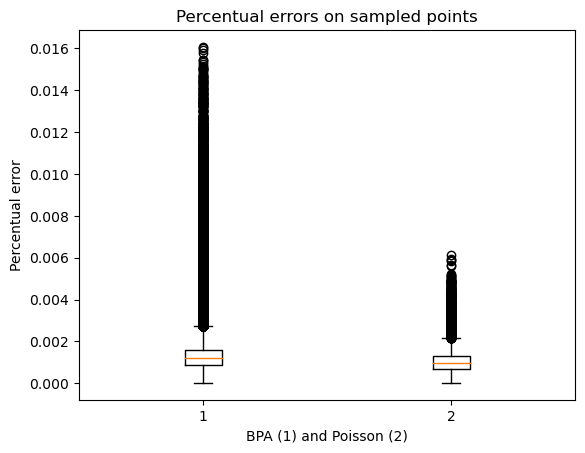

In [105]:
compute_errors("Data/aorta_original.stl", "aorta_bpa_ds_05.ply", "aorta_poisson_ds_05.ply")